<a href="https://colab.research.google.com/github/zia207/Python_for_Beginners/blob/main/Notebook/01_04_02_inferential_statistics_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1IFEWet-Aw4DhkkVe1xv_2YYqlvRe9m5_)

# 4.2 Inferential Statistics

This section of the tutorial focuses on **Inferential Statistics** using Python. Inferential statistics is a branch of statistics that allows us to make conclusions about a population based on a sample of data. It involves estimating population parameters, testing hypotheses, and making predictions. This section will cover key concepts in inferential statistics, including point estimation, interval estimation, data distribution, and hypothesis testing. We will also explore how to implement these concepts using Python programming language with libraries such as NumPy, SciPy, Pandas, and Matplotlib.

## Introduction

**Inferential statistics** is a crucial branch of statistics that deals with utilizing a sample of data to draw conclusions or make predictions about a larger population. It involves using various statistical methods and techniques to analyze the data and infer results beyond the observed data.

The main goal of inferential statistics is to estimate unknown parameters of a population, such as its mean or variance, based on the information gathered from a sample. By doing so, it helps researchers make informed decisions and draw reliable conclusions about the larger population, even with limited data. In summary, inferential statistics plays a significant role in the field of research by providing a framework for statistical inference and prediction.

## Key Concepts in Inferential Statistics

Inferential statistics is the branch of statistics that deals with making inferences about a population based on data from a sample. This involves several key concepts used to estimate and test hypotheses about population parameters.

1. **Population and Sample**: A population is the entire group of individuals, objects, or events being studied. A sample is a subset of the population used to represent the whole. Choosing a sample representative of the population is important to ensure accurate inferences.
2. **Estimation**: Estimation is using sample data to estimate population parameters. There are two types of estimation:
   - **Point Estimation**: Involves using sample data to estimate a single value (such as the mean or proportion) for the population.
   - **Interval Estimation**: Involves estimating a range within which the population parameter lies, typically using confidence intervals, which provide a range of values with a certain confidence level.
3. **Sampling Distributions**: Sampling distributions are the probability distributions of sample statistics (such as the mean or proportion) calculated from repeated random samples drawn from the population. The most important sampling distribution is the sampling distribution of the sample mean, used to make inferences about the population mean.
4. **Hypothesis Testing**: Hypothesis testing uses sample data to test hypotheses about population parameters. The key concepts in hypothesis testing are:
   - **Null Hypothesis (H0)**: This is a statement that there is no effect or no difference between groups.
   - **Alternative Hypothesis (Ha)**: This statement contradicts the null hypothesis.
   - **Significance Level (α)**: This is the threshold used to assess the strength of evidence against the null hypothesis.
   - **p-value**: This is the probability of observing the data given that the null hypothesis is true.
   - **Types of Errors**: There are two types of errors in hypothesis testing: Type I (rejecting a true null hypothesis) and Type II (failing to reject a false null hypothesis).
5. **Regression and Correlation**: Regression and correlation are statistical methods used to analyze the relationships between variables in a population. Regression is used to predict one variable's value based on the values of other variables. In contrast, correlation measures the strength and direction of the relationship between two variables.
6. **Analysis of Variance (ANOVA)**: A statistical method to compare means among three or more groups. It tests hypotheses related to mean differences of multiple groups for a given variable. One-Way ANOVA is used when comparing means of a single dependent variable across three or more independent categorical groups.

Understanding inferential statistics is critical in decision-making processes in various fields, such as healthcare, social sciences, and business. This tutorial provides a comprehensive understanding of the essential concepts in inferential statistics, making it an indispensable tool for anyone interested in this field.

### Prerequisites

Install the required packages:

In [ ]:
import importlib.util
import sys

# List of required packages
packages = ['pandas', 'scipy', 'matplotlib']

# Check and install missing packages
for package in packages:
    if not importlib.util.find_spec(package):
        try:
            import pip
            pip.main(['install', package])
        except ImportError:
            print(f"Failed to install {package}. Pip is not available.")

# Import packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import beta
from scipy.stats import t as t_dist
from scipy.stats import gamma as gamma_dist
from scipy.stats import weibull_min
from scipy.stats import levene
from scipy.stats import chi2_contingency

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
# Verify package availability
for package in packages:
    print(f"{package} installed: {bool(importlib.util.find_spec(package))}")

pandas installed: True
scipy installed: True
matplotlib installed: True


## Data

All data sets used in this exercise can be downloaded from the original [Dropbox](https://www.dropbox.com/scl/fo/fohioij7h503duitpl040/h?rlkey=3voumajiklwhgqw75fe8kby3o&dl=0) or from the [GitHub](https://github.com/zia207/r-colab/tree/main/Data/R_Beginners) accounts.

In [ ]:
import pandas as pd

# Load the dataset directly from GitHub
url = "https://github.com/zia207/Python_for_Beginners/raw/refs/heads/main/Data/rice_arsenic_data.csv"
mf = pd.read_csv(url)

# Display first few rows to inspect
print(mf.head())

   ID  TREAT_ID   TREAT   VAR          PH         TN         PN       ster  \
0   1         1  Low As  BR01  119.748701  16.701608  15.509622   1.121060   
1   2         1  Low As  BR01   98.698244  27.946359  26.738585  11.272871   
2   3         1  Low As  BR01  133.877538   6.416868   2.846243  15.267027   
3   4         1  Low As  BR01  123.007192  20.932223  16.971565   4.953537   
4   5         1  Low As  BR01   89.497158  25.957307  21.515372   3.814338   

          DTM         GY         SW       GAs       STAs  
0  116.688768  43.914848  24.449009  0.862644  15.237639  
1  119.423068  47.813066  30.658419  0.844258  13.369586  
2  121.314026  21.875951  25.888309  1.138247  16.652081  
3  120.924087  48.439764  54.924009  1.044528  20.770175  
4  115.363049  44.404465  57.380661  0.686414  13.670520  


## Population and Samples

When conducting research or gathering data, it's important to understand the concepts of **population** and **sample**. The population refers to the entire group or collection of items or individuals that you're interested in studying or collecting data from. For example, if you want to know the heights of all individuals in a country, the entire set of heights of every person in that country would constitute the population.

A **population parameter** is a characteristic of the entire population, such as the mean, standard deviation, proportion, or other measurable attribute. These parameters can be difficult or impossible to determine for the entire population, which is why researchers often rely on samples.

A sample is a subset or smaller group selected from the population. It's usually not feasible to measure or collect data from every individual in a population, so researchers will select a smaller group to represent the population. For example, if you want to estimate the average height of individuals in a country, you might take a sample of 500 individuals and measure their heights. This smaller group represents the sample.

A **sample statistic** is a characteristic or measure computed from the sample that is used to estimate or infer the population parameter. For example, if you measure the heights of 500 individuals in a country, you can calculate the average height of the sample, which is a sample statistic. This statistic can be used to estimate the population parameter, such as the average height of all individuals in the country.

## Estimation

**Estimation** is a statistical technique that uses sample data to make inferences about population parameters. The ultimate goal of estimation is to get as close as possible to the true value of the parameter for the entire population based on information obtained from a representative subset of that population.

There are two main types of estimation: **point estimation** and **interval estimation**. Point estimation involves using sample data to estimate a single numerical value for the population parameter, such as the mean or proportion. This approach assumes that the sample is representative of the population and that the parameter being estimated is fixed and known. Interval estimation, on the other hand, involves estimating a range of values within which the population parameter is likely to exist. This is typically done using confidence intervals, which provide a range of values with a certain confidence level. In other words, if the same sample were taken multiple times, the confidence interval would contain the true population parameter in a certain percentage of cases.

Interval estimation is generally considered more informative than point estimation, as it provides a range of values rather than a single-point estimate. However, it also requires more data and assumptions about the population distribution being studied. Ultimately, the choice between point estimation and interval estimation depends on the specific research question, the available data, and the precision required for the analysis.

### Point Estimation

In [ ]:
import numpy as np

# Estimating the Population Mean
# Calculating the sample mean (point estimate for the population mean)
sample_mean = mf['GAs'].mean()
print(sample_mean)

1.3600298571214287


In [ ]:
# Calculating the sample proportion (point estimate for the population proportion)
data = mf['TREAT']
sample_proportion = (data == 'Low As').sum() / len(data)
print(sample_proportion)

0.5


### Interval Estimation

In statistical analysis, interval estimation is a technique used to estimate the value of an unknown population parameter with a degree of certainty. This technique involves calculating a range, or interval, of values within which the true value of the parameter is likely to fall, based on a sample of data. This interval provides researchers with a measure of the uncertainty around the point estimate of the population parameter, and enables them to make inferences about the population with a known level of confidence.

In [ ]:
from scipy import stats

# Confidence Interval for Population Mean
data = mf['GAs']
# Calculating the sample mean and standard deviation
sample_mean = data.mean()
sample_std_dev = data.std()
# Calculating the confidence interval for the population mean (assuming normal distribution)
confidence_level = 0.95 # Adjust as needed
alpha = 1 - confidence_level
n = len(data)
# Calculating margin of error
margin_of_error = stats.t.ppf(1 - alpha / 2, n - 1) * (sample_std_dev / np.sqrt(n))
# Calculating lower and upper bounds of the confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error
# Outputting the confidence interval
print(f"Confidence Interval for Population Mean (95%): {round(lower_bound, 2)} to {round(upper_bound, 2)}")

Confidence Interval for Population Mean (95%): 1.28 to 1.44


To compute an interval, we use the sample mean, sample standard deviation, and the t-distribution. This accounts for any uncertainty. If you adjust the `confidence_level` variable, you can change the confidence level for the interval estimation. Understanding interval estimation is important as it helps you quantify the uncertainty around point estimates. It also provides a range of values where the true population parameter is likely to fall.

## Sample Distribution

The **sampling distribution** is a statistical concept that refers to the probability distribution of a statistic, such as the mean, variance, or proportion, obtained from multiple random samples taken from the same population. It helps illustrate how sample statistics might vary if multiple samples were drawn from the same population. This distribution is a theoretical representation of all possible sample statistics obtained from repeated sampling from the same population. Understanding the sampling distribution is critical in statistical inference, as it helps determine the probability of obtaining a particular sample statistic and, consequently, the likelihood of making accurate inferences about the population.

In [ ]:
import matplotlib.pyplot as plt

np.random.seed(42) # Setting seed for reproducibility
# Number of samples to draw
num_samples = 1000
sample_size = 30 # Size of each sample
# Creating an empty list to store sample means
sample_means = []
# Generating multiple samples and calculating sample means
for i in range(num_samples):
    sample = np.random.choice(mf['GAs'], sample_size)
    sample_means.append(np.mean(sample))

We use `plt.hist()` to create a histogram of means:

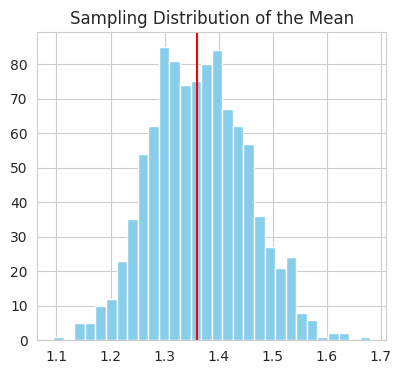

In [ ]:
# Plotting the histogram of sample means
plt.figure(figsize=(4.5, 4))
plt.hist(sample_means, bins=30, color='skyblue')
plt.axvline(mf['GAs'].mean(), color='red')
plt.title('Sampling Distribution of the Mean')
plt.show()

In the above example, we draw 1000 samples of size 30 from this population. For each of these samples, we calculate their means. Finally, we plot a histogram of these sample means, which shows the approximate normal distribution. This means that as the sample size increases, the sample means tend to approach a normal distribution, regardless of the shape of the population distribution. The **Central Limit Theorem** is a fundamental statistical concept that allows us to make inferences about a population based on a sample. Red line on plot show the population mean.

> ***Central Limit Theorem***  

> The **Central Limit Theorem** is a statistical concept that explains how the distribution of sample means tends to be normally distributed, regardless of the underlying population distribution, as the sample size increases. In simpler terms, if we were to take several random samples from a population, the average of each sample would create a normal distribution, even if the original population is not normally distributed. This theorem is widely used in statistical analysis and is essential in making inferences about the population based on the sample data.

## Data Distribution

In statistics, data distribution is a fundamental concept that describes how data points are distributed or spread out over a range of values. It is an important aspect of statistical analysis as it helps to understand the underlying characteristics of a data set. A thorough understanding of data distribution allows researchers to select appropriate statistical tests, detect outliers, identify patterns and trends, and make informed decisions.

Data distribution can be represented graphically using various methods such as histograms, density plots, and qq-plots or probability plots. Histograms are graphical representations that display the distribution of numerical data. They plot the frequency of data points within different intervals or "bins" along the x-axis. Density plots are similar to histograms, but they use a smooth curve instead of using bars to represent the frequency of data points. Qq-plots or probability plots are graphical methods used to assess whether a given data set follows a particular distribution. These plots compare the distribution of the data set to a theoretical distribution, such as the normal distribution.

There are several types of data distributions, including:

### Normal Distribution

Normal distribution is also known as **Gaussian** distribution, it is a bell-shaped curve that is symmetric around the mean. It is used to model data that is distributed evenly around the mean, with a few data points on the tails of the distribution.

The probability density function (pdf), (a statistical function that describes the likelihood of a continuous random variable taking on a particular value) of the normal distribution is given by the following formula:

$$ f(x \mid \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} \, e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2} $$

Where:
- $x$ is the variable for which the probability density is calculated.
- $\mu$ is the mean of the distribution.
- $\sigma$ is the standard deviation of the distribution.
- $\pi$ is the mathematical constant pi (approximately 3.14159).
- $e$ is the mathematical constant Euler's number (approximately 2.71828).

This formula describes the bell-shaped curve of the normal distribution. The parameters $\mu$ and $\sigma$ determine the location and spread of the distribution, respectively.

When $\mu = 0$ and $\sigma = 1$, the normal distribution is referred to as the standard normal distribution. In this case, the formula simplifies to:

$$ f(x) = \frac{1}{\sqrt{2\pi}} \, e^{-\frac{1}{2}x^2} $$

This standard normal distribution has a mean of 0 and a standard deviation of 1. The probability density function represents the likelihood of observing a particular value $x$ in the distribution.

Python has built-in functions in SciPy to generate normal distribution. They are described below.
- `norm.pdf(x, loc, scale)` - probability density function
- `norm.cdf(q, loc, scale)` - cumulative distribution function
- `norm.ppf(p, loc, scale)` - percent point function (inverse cdf)
- `norm.rvs(loc=0, scale=1, size=1)` - random variates

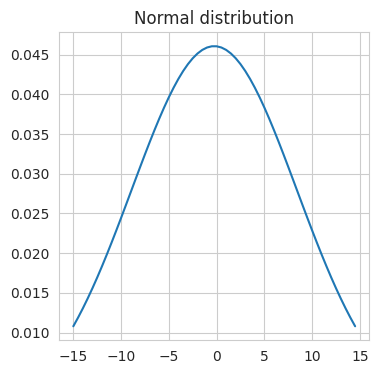

In [ ]:
from scipy.stats import norm

# Plot the graph.
x = np.arange(-15, 15, 0.5)
y = norm.pdf(x, loc=np.mean(x), scale=np.std(x))
plt.figure(figsize=(4, 4))
plt.plot(x, y)
plt.title('Normal distribution')
plt.show()

**Skewed distribution**: A skewed distribution is one in which the data points are not evenly distributed around the mean. There are two types skewed distributions: positively skewed (skewed to the right) and negatively skewed (skewed to the left). In a positively skewed distribution, the tail of the distribution is longer on the right side, while in a negatively skewed distribution, the tail is longer on the left side.

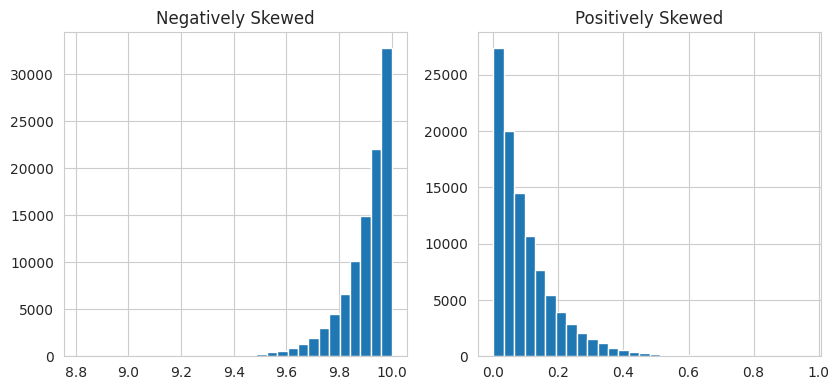

In [ ]:
from scipy.stats import beta

np.random.seed(5)
# Left or negatively skewed
x_neg = beta.rvs(100, 1, size=100000) * 10
plt.figure(figsize=(8.5, 4))
plt.subplot(1, 2, 1)
plt.hist(x_neg, bins=30)
plt.title('Negatively Skewed')

# Right skewness or positively skewed
x_pos = beta.rvs(1, 100, size=100000) * 10
plt.subplot(1, 2, 2)
plt.hist(x_pos, bins=30)
plt.title('Positively Skewed')
plt.tight_layout()
plt.show()

A **Uniform distribution** is one in which all the data points are equally likely to occur. This type of distribution is often used in simulations and random number generation.

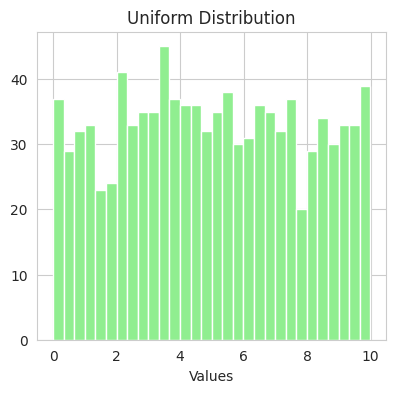

In [ ]:
# Generating Uniformly distributed data
np.random.seed(123) # Setting seed for reproducibility
# Generating Uniform distributed data within a specified interval
uniform_data = np.random.uniform(low=0, high=10, size=1000) # Change min and max values as needed
# Plotting the Uniform distribution
plt.figure(figsize=(4.5, 4))
plt.hist(uniform_data, bins=30, color='lightgreen')
plt.title('Uniform Distribution')
plt.xlabel('Values')
plt.show()

### Bimodal Distribution

A bimodal distribution has two distinct peaks or modes. This means that the data can be divided into two distinct groups with different characteristics or patterns. For example, a data set of test scores may have one peak for students who scored well and another for students who scored poorly. This type of distribution can occur when two different populations are merged or when a single population exhibits two different patterns. Bimodal distributions are essential to understanding statistics because they can affect data interpretation and statistical models' accuracy.

The common way to create a bimodal distribution is by combining two unimodal distributions. Let's consider a simple example where we create a bimodal distribution by summing two normal distributions:
If $X_1 \sim \mathcal{N}(\mu_1, \sigma_1^2)$ and $(X_2 \sim \mathcal{N}(\mu_2, \sigma_2^2)$ are two independent normal distributions, then their sum $Y = X_1 + X_2$ would result in a distribution that is bimodal. The parameters $\mu_1, \sigma_1, \mu_2, \sigma_2$ determine the location and spread of each individual normal distribution, and the sum introduces the bimodal characteristic.

The probability density function (PDF) of the bimodal distribution is obtained by convolving the PDFs of the individual distributions. For normal distributions, the convolution of two normal distributions is another normal distribution. Therefore, the PDF of the sum of two normal distributions is itself a normal distribution, and the sum creates the bimodal appearance.
The PDF for the sum of two normal distributions would involve terms related to $\mu_1, \sigma_1, \mu_2, \sigma_2$, and their interplay would determine the location and separation of the modes.

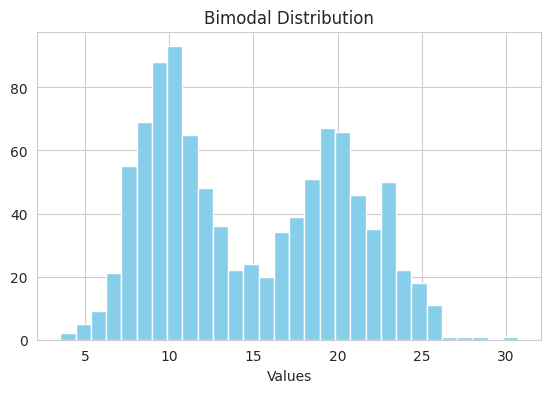

In [ ]:
# Generating a bimodal distribution by combining two normal distributions
np.random.seed(123) # Setting seed for reproducibility
# Generating data from two normal distributions
data1 = np.random.normal(loc=10, scale=2, size=500) # First normal distribution
data2 = np.random.normal(loc=20, scale=3, size=500) # Second normal distribution
# Combining the data from both distributions
bimodal_data = np.concatenate([data1, data2])
# Plotting the bimodal distribution
plt.figure(figsize=(6.5, 4))
plt.hist(bimodal_data, bins=30, color='skyblue')
plt.title('Bimodal Distribution')
plt.xlabel('Values')
plt.show()

### Log-Normal Distribution

The log-normal distribution is used when the logarithm of a variable follows a normal distribution. In other words, if the natural logarithm of a variable (e.g., stock prices, asset returns, etc.) is normally distributed, then the variable follows a log-normal distribution. This distribution is frequently used in finance and economics to model stock prices, asset returns, and income phenomena. The log-normal distribution is characterized by its skewed shape, with a long right tail and a short-left tail. Despite its asymmetry, the log-normal distribution has valuable properties, such as being closed under multiplication, making it a useful tool for modeling certain data types.

The probability density function (PDF) of the log-normal distribution describes the distribution of a random variable whose natural logarithm is normally distributed. If $X$ is a log-normally distributed random variable, its PDF is given by:

$$ f(x \mid \mu, \sigma) = \frac{1}{x\sigma\sqrt{2\pi}} \exp\left(-\frac{(\ln(x) - \mu)^2}{2\sigma^2}\right) $$

Where:
- $x > 0$ is the variable for which the probability density is calculated.
- $\mu$ is the mean of the natural logarithm of the distribution.
- $\sigma$ is the standard deviation of the natural logarithm of the distribution.
- $\pi$ is the mathematical constant pi (approximately 3.14159).
- $\ln(x)$ is the natural logarithm of $x$.

In the formula, $\mu$ and $\sigma$ are parameters that determine the location and spread of the distribution, respectively.

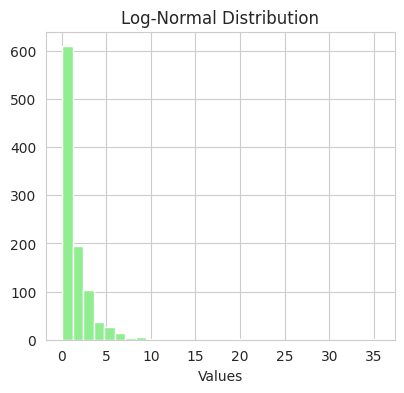

In [ ]:
# Generating log-normal distributed data
np.random.seed(123) # Setting seed for reproducibility
# Generating log-normal distributed data with specified meanlog and sdlog
log_normal_data = np.random.lognormal(mean=0, sigma=1, size=1000)
# Plotting the log-normal distribution
plt.figure(figsize=(4.5, 4))
plt.hist(log_normal_data, bins=30, color='lightgreen')
plt.title('Log-Normal Distribution')
plt.xlabel('Values')
plt.show()

### Exponential Distribution

In probability theory and statistics, the exponential distribution is a continuous probability distribution widely used to represent the time between two events occurring in a Poisson process. The Poisson process is a stochastic process that models the number of events occurring in a fixed time interval, given that the events occur independently and at a constant rate ($\lambda$). The exponential distribution is used to model the time between two such events, assuming that the events occur independently and at a constant rate. It is a fundamental distribution in the field of reliability engineering and is used to model the failure times of devices that fail at a constant rate. It also has applications in queuing theory, where it is used to model the time between the arrivals of customers to a service facility.

The exponential distribution is defined for $x \geq 0$ and is given by:

$$ f(x \mid \lambda) = \lambda e^{-\lambda x} $$

Where:
- $x$ is the variable for which the probability density is calculated.
- $\lambda$ is the rate parameter, representing the average number of events per unit of time.

The cumulative distribution function (CDF) of the exponential distribution is given by:

$$ F(x \mid \lambda) = 1 - e^{-\lambda x} $$

Where:
- $F(x \mid \lambda)$ is the probability that the random variable is less than or equal to $x$.

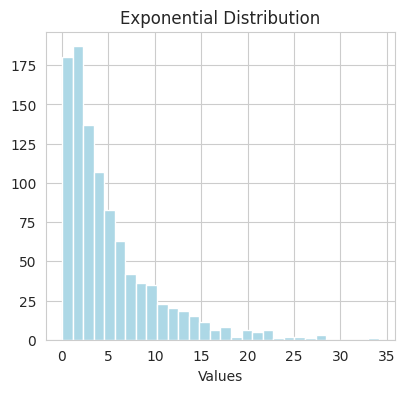

In [ ]:
# Generating exponentially distributed data
np.random.seed(123) # Setting seed for reproducibility
# Generating exponential distributed data with a specified rate parameter (lambda)
exponential_data = np.random.exponential(scale=1/0.2, size=1000) # scale = 1/rate
# Plotting the exponential distribution
plt.figure(figsize=(4.5, 4))
plt.hist(exponential_data, bins=30, color='lightblue')
plt.title('Exponential Distribution')
plt.xlabel('Values')
plt.show()

### Poisson Distribution

The concept of modeling the frequency of events in a fixed time or space interval involves estimating the number of events that are likely to occur based on a known average rate of occurrence. This technique is commonly used to predict the number of events that are likely to happen within a specific time or space frame. By using a statistical approach, it's possible to approximate the probability of an event occurring and to make informed decisions based on that probability. This technique is particularly useful in fields such as finance, insurance, and science, where the ability to predict the likelihood of future events is essential for making effective decisions.

The probability mass function (PMF) of the Poisson distribution describes the probability of a given number of events occurring in a fixed interval of time or space, given a known average rate of occurrence ($\lambda$). The Poisson distribution is often used to model rare events or events that occur independently of each other.

The PMF of the Poisson distribution is given by:

$$ P(X = k \mid \lambda) = \frac{e^{-\lambda} \cdot \lambda^k}{k!} $$

Where:
- $X$ is the random variable representing the number of events.
- $k$ is a non-negative integer (0, 1, 2, ...) representing the number of events.
- $\lambda$ is the average rate of events occurring in the given interval.
- $e$ is the mathematical constant Euler's number, approximately 2.71828.

The expression $\frac{e^{-\lambda} \cdot \lambda^k}{k!}$ represents the probability of observing exactly $k$ events in the specified interval.

The expected value (mean) and variance of a Poisson-distributed random variable are both equal to $\lambda$.

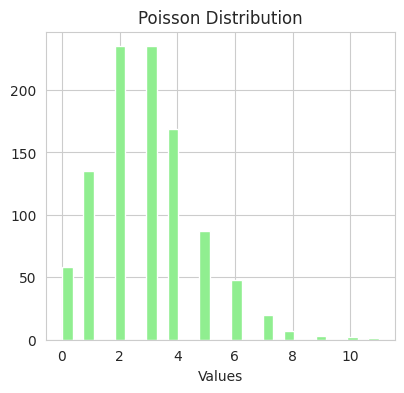

In [ ]:
# Generating Poisson-distributed data
np.random.seed(123) # Setting seed for reproducibility
# Generating Poisson distributed data with a specified lambda (mean rate)
poisson_data = np.random.poisson(lam=3, size=1000) # Change the lambda parameter as needed
# Plotting the Poisson distribution
plt.figure(figsize=(4.5, 4))
plt.hist(poisson_data, bins=30, color='lightgreen')
plt.title('Poisson Distribution')
plt.xlabel('Values')
plt.show()

### Gamma and Weibull Distributions

The Gamma and Weibull distribution is a continuous probability distribution commonly used in engineering, physics, and other fields to model variables that take on positive values. It is a generalization of the exponential distribution and is often used when the rate of change is not constant over time. Weibull distribution can exhibit a broader range of shapes, from exponential-like to normal-like, whereas Gamma tends to be more skewed and often shows a different set of shapes. Both distributions have different parameterizations; the Weibull has a shape and scale parameter, while the Gamma has shape and scale parameters but in a different configuration. Weibull is commonly used in reliability engineering for modeling time to failure or survival analysis. At the same time, Gamma is more diverse, being applied in various fields for modeling different types of skewed data, such as income distribution or wait times.

**Gamma Distribution**:

The probability density function (PDF) of the gamma distribution is defined as follows:

$$ f(x \mid \alpha, \beta) = \frac{\beta^\alpha x^{\alpha - 1} e^{-\beta x}}{\Gamma(\alpha)} $$

Where:
- $x$ is the variable for which the probability density is calculated.
- $\alpha$ is the shape parameter.
- $\beta$ is the rate parameter.
- $\Gamma(\alpha)$ is the gamma function.

The gamma distribution is a generalization of the exponential distribution. When $\alpha = 1$, it reduces to the exponential distribution.

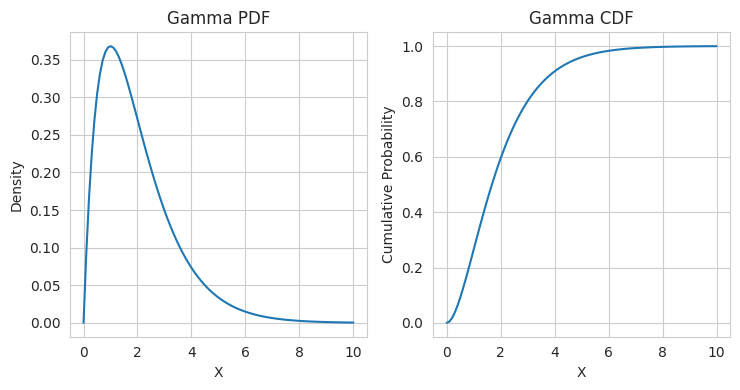

In [ ]:
from scipy.stats import gamma as gamma_dist

# Create a sequence of x values
x_gamma = np.linspace(0, 10, 100)
# Calculate PDF values
pdf_gamma = gamma_dist.pdf(x_gamma, a=2, scale=1) # Example parameters: shape = 2, rate = 1 (scale=1/rate)
# Plot the PDF
plt.figure(figsize=(7.5, 4))
plt.subplot(1, 2, 1)
plt.plot(x_gamma, pdf_gamma)
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Gamma PDF')

# Calculate CDF values
cdf_gamma = gamma_dist.cdf(x_gamma, a=2, scale=1) # Example parameters: shape = 2, rate = 1
# Plot the CDF
plt.subplot(1, 2, 2)
plt.plot(x_gamma, cdf_gamma)
plt.xlabel('X')
plt.ylabel('Cumulative Probability')
plt.title('Gamma CDF')
plt.tight_layout()
plt.show()

**Weibull Distribution**

The probability density function (PDF) of the Weibull distribution is defined as follows:

$$ f(x \mid \lambda, k) = \frac{k}{\lambda} \left(\frac{x}{\lambda}\right)^{k-1} e^{-(x/\lambda)^k} $$

Where:
- $x$ is the variable for which the probability density is calculated.
- $\lambda$ is the scale parameter.
- $k$ is the shape parameter.

The Weibull distribution can take on various shapes depending on the value of the shape parameter $k$. When $k > 1$, it is right-skewed (increasing hazard rate), when $k < 1$, it is left-skewed (decreasing hazard rate), and when $k = 1$, it reduces to the exponential distribution.

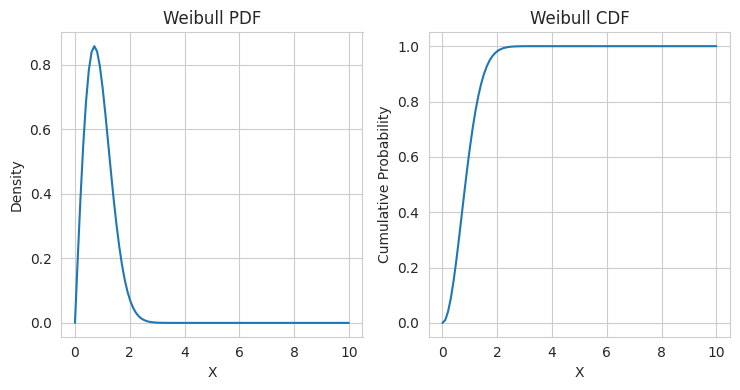

In [ ]:
from scipy.stats import weibull_min

# Create a sequence of x values
x_weibull = np.linspace(0, 10, 100)
# Calculate PDF values
pdf_weibull = weibull_min.pdf(x_weibull, c=2, scale=1) # Example parameters: shape = 2, scale = 1
# Plot the PDF
plt.figure(figsize=(7.5, 4))
plt.subplot(1, 2, 1)
plt.plot(x_weibull, pdf_weibull)
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Weibull PDF')

# Calculate CDF values
cdf_weibull = weibull_min.cdf(x_weibull, c=2, scale=1) # Example parameters: shape = 2, scale = 1
# Plot the CDF
plt.subplot(1, 2, 2)
plt.plot(x_weibull, cdf_weibull)
plt.xlabel('X')
plt.ylabel('Cumulative Probability')
plt.title('Weibull CDF')
plt.tight_layout()
plt.show()

In both the gamma and Weibull distributions, the parameters $\alpha, \beta, \lambda$, and $k$ determine the characteristics of the distribution, including its shape, scale, and location. Adjusting these parameters allows for flexibility in modeling different types of data.

> **Note:** The **Probability Density Function (PDF)** and Cumulative Distribution Function (CDF) are fundamental concepts in probability theory and statistics, both describing different aspects of a probability distribution.  

> **Probability Density Function (PDF)**  
> - **Definition:** The PDF represents the probability that a continuous random variable takes on a particular value or falls within a certain range of values.  
> - **Function:** For a continuous random variable $X$, the PDF $F(x)$ gives the probability density at a specific value $x$. It's non-negative and integrates over the entire range to 1. Mathematically, for a continuous random variable $X$, the probability that $X$ falls in the interval $[a, b]$ is given by the integral of the PDF over that interval:  
> $$ P(a \leq X \leq b) = \int_{a}^{b} f(x) \,dx $$  
> - **Interpretation:** The PDF at a specific point doesn't directly provide a probability but rather describes the relative likelihood of the variable taking that value.  
> - **Use:** It's used to visualize the shape and characteristics of a continuous probability distribution.  
> **Cumulative Distribution Function (CDF)**  
> - **Definition:** The CDF gives the probability that a random variable $X$ is less than or equal to a certain value $x$.  
> - **Function:** For a random variable $X$, the CDF $f(x)$ at a point $x$ is the probability that $X$ takes a value less than or equal to $x$. Mathematically, the CDF is expressed as:  
> $$ F(x) = \int_{-\infty}^{x} f(t) \,dt $$  
> The derivative of the CDF with respect to $x$ gives the PDF: $f(x) = \frac{d}{dx}F(x)$.  
> - **Properties:** It always starts at 0 and approaches 1 as (x) increases. It's non-decreasing, right-continuous, and defines the entire distribution.  
> - **Use:** It's useful for determining probabilities of events within a certain range or understanding the overall behavior of a random variable.  
> ***Differences***:  
> - **Nature:** PDF gives the density of probabilities at specific values, while CDF gives cumulative probabilities up to a particular value.  
> - **Interpretation:** PDF does not directly give probabilities but describes relative likelihoods, while CDF directly provides probabilities.  
> - **Integration:** The CDF is obtained by integrating the PDF, and it's the accumulation of probabilities up to a certain point.  
> - **Ranges:** PDF works with individual values or ranges, whereas CDF works with cumulative probabilities up to a given value.  
> ***Relationship***:  
> The relationship between the PDF and CDF is integral:  
> - The PDF is the derivative of the CDF. Integrating the PDF over a range gives the probability associated with that range, which corresponds to the change in the CDF over that range.  
> Both PDF and CDF are crucial in understanding and working with probability distributions, with each providing unique insights into the behavior and characteristics of random variables.

### Chi-Square Distribution ($\chi^2$)

The Chi-Square distribution ($\chi^2$) is a continuous probability distribution that is commonly used in statistics and probability theory. It is particularly useful in the context of hypothesis testing and confidence intervals. The distribution is derived by summing the squares of independent standard normal random variables. This is known as a sum of squares, which is a common measurement used in statistical analysis. The $\chi^2$ has a number of important properties that make it a useful tool. For one, it is always positive, which means it can be used to model non-negative random variables. It also has an infinite number of degrees of freedom, which makes it a flexible distribution that can be used in a wide range of applications.

The probability density function (PDF) of the chi-square distribution is defined as follows:

$$ f(x \mid k) = \frac{x^{(k/2 - 1)} e^{-x/2}}{2^{k/2} \Gamma(k/2)} $$

Where:
- $x$ is the variable for which the probability density is calculated.
- $k$ is the degrees of freedom parameter.
- $\Gamma(k/2)$ is the gamma function evaluated at $k/2$.

The $\chi^2$ is a continuous probability distribution that arises in the context of statistical inference, particularly in hypothesis testing and confidence interval construction. The degrees of freedom parameter, $k$, determines the shape of the distribution.

Key points:
- The $\chi^2$ is the distribution of the sum of the squares of $k$ independent standard normal random variables.
- When $k = 1$, the $\chi^2$ is equivalent to the exponential distribution.
- The expected value (mean) of the $\chi^2$ is $k$, and its variance is $2k$.

The $\chi^2$ plays an important role in many statistical tests, including the Chi-Square test for goodness of fit, the Chi-Square test for independence, and the Chi-Square test for homogeneity. These tests are commonly used to determine whether a set of data is consistent with a particular hypothesis or whether there is a significant difference between two or more groups. Overall, the $\chi^2$ is a powerful tool for analyzing data and making predictions. Its properties and applications make it a valuable resource for statisticians and researchers across a wide range of fields.

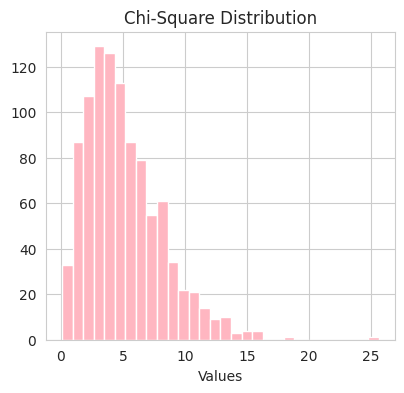

In [ ]:
# Generating Chi-Square distributed data
np.random.seed(123) # Setting seed for reproducibility
# Generating Chi-Square distributed data with specified degrees of freedom
df_val = 5 # Change degrees of freedom as needed
chi_square_data = np.random.chisquare(df=df_val, size=1000)
# Plotting the Chi-Square distribution
plt.figure(figsize=(4.5, 4))
plt.hist(chi_square_data, bins=30, color='lightpink')
plt.title('Chi-Square Distribution')
plt.xlabel('Values')
plt.show()

### Beta Distribution

The Beta distribution is a probability distribution that is commonly used to model random variables that have values constrained to a fixed interval between 0 and 1. The distribution function takes two parameters, alpha and beta, which are shape parameters that determine the shape of the distribution.

The probability density function (PDF) of the beta distribution is defined as follows:

$$ f(x \mid \alpha, \beta) = \frac{x^{\alpha-1} (1-x)^{\beta-1}}{B(\alpha, \beta)} $$

Where:
- $x$ is the variable for which the probability density is calculated, and $0 \leq x \leq 1$.
- $\alpha$ and $\beta$ are shape parameters, and $\alpha, \beta > 0$.
- $B(\alpha, \beta)$ is the beta function, given by $B(\alpha, \beta) = \frac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha + \beta)}$, where $\Gamma$ is the gamma function, an extension of the factorial function to complex numbers and real numbers (except negative integers where it is undefined).

The beta distribution is defined on the interval $[0, 1]$, making it suitable for modeling random variables that represent proportions or probabilities. The shape parameters $\alpha$ and $\beta$ control the shape of the distribution.

Key points:
- When $\alpha = \beta = 1$, the beta distribution is the uniform distribution on $[0, 1]$.
- As $\alpha$ and $\beta$ increase, the distribution becomes more peaked around the mean.
- The expected value (mean) of the beta distribution is $\frac{\alpha}{\alpha + \beta}$, and its variance is given by $\frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}$.

The Beta distribution is widely used in Bayesian statistics because it provides a way to model the uncertainty of a probability distribution. It is also used in machine learning for tasks such as modeling proportions and predicting outcomes based on probabilities. One of the key advantages of the Beta distribution is its flexibility. It can be used to model a wide range of shapes and can be customized to fit specific data sets. This makes it a versatile tool for data analysis and modeling. Furthermore, the Beta distribution has several important properties that make it a useful tool in statistical analysis. For instance, it is a conjugate prior for the binomial and Bernoulli distributions, which means that it can be used to update the prior belief about the probability of a binary outcome when new data become available.

Overall, the Beta distribution is an essential tool for anyone working with data that is constrained to lie within a fixed range, such as probabilities, proportions, or percentages. Its versatility, flexibility, and important statistical properties make it a powerful tool for data analysis and modeling.

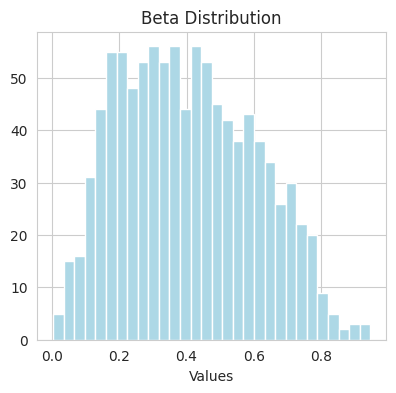

In [ ]:
# Generating Beta-distributed data
np.random.seed(123) # Setting seed for reproducibility
# Generating Beta distributed data with specified shape parameters (alpha and beta)
alpha = 2 # Change alpha parameter as needed
beta_val = 3 # Change beta parameter as needed
beta_data = np.random.beta(a=alpha, b=beta_val, size=1000)
# Plotting the Beta distribution
plt.figure(figsize=(4.5, 4))
plt.hist(beta_data, bins=30, color='lightblue')
plt.title('Beta Distribution')
plt.xlabel('Values')
plt.show()

### t-Distribution

The t-distribution, also known as Student's t-distribution, is a probability distribution that is symmetric and bell-shaped, much like the normal distribution. However, it has heavier tails compared to the normal distribution, allowing for more variability in data.

The probability density function (PDF) of the t-distribution is given by:

$$ f(t \mid \nu) = \frac{\Gamma\left(\frac{\nu + 1}{2}\right)}{\sqrt{\nu \pi} \cdot \Gamma\left(\frac{\nu}{2}\right)} \left(1 + \frac{t^2}{\nu}\right)^{-\frac{\nu + 1}{2}} $$

Where:
- $t$ is the variable for which the probability density is calculated.
- $\nu$ is the degrees of freedom parameter.
- $\Gamma$ is the gamma function.

The t-distribution is used in hypothesis testing when the population standard deviation is unknown, and sample sizes are small. It is similar in shape to the standard normal distribution but has heavier tails. As the degrees of freedom $\nu$ increase, the t-distribution approaches the standard normal distribution.

Key points:
- When $\nu = 1$, the t-distribution is equivalent to the Cauchy distribution, which has undefined mean and variance.
- The mean of the t-distribution is 0, and its variance is $\frac{\nu}{\nu - 2}$ for $\nu > 2$.
- The t-distribution is symmetric around 0.

The t-distribution arises from the standardization of normally distributed data when the population standard deviation is unknown and estimated from the sample. It's frequently used in hypothesis testing, confidence interval estimation, and modeling when dealing with small sample sizes or situations where population variance is not known.

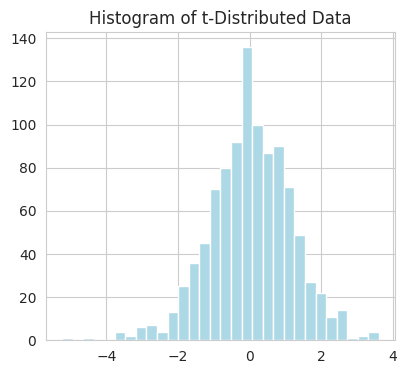

In [ ]:
from scipy.stats import t as t_dist

# Generating random numbers from a t-distribution with 10 degrees of freedom
np.random.seed(123) # Setting seed for reproducibility
t_distribution_data = t_dist.rvs(df=10, size=1000)
# Calculating the probability density at x = 1.5 for t-distribution with 10 degrees of freedom
density_at_x = t_dist.pdf(1.5, df=10)
# Calculating the cumulative probability up to x = 1.5 for t-distribution with 10 degrees of freedom
cumulative_prob = t_dist.cdf(1.5, df=10)
# Calculating the quantile for a probability of 0.95 in t-distribution with 10 degrees of freedom
quantile_value = t_dist.ppf(0.95, df=10)
# Plotting a histogram of t-distributed data
plt.figure(figsize=(4.5, 4))
plt.hist(t_distribution_data, bins=30, color='lightblue')
plt.title('Histogram of t-Distributed Data')
plt.show()

### F-Distribution

The F-distribution, also known as Fisher-Snedecor distribution, is a continuous probability distribution that arises in statistical analysis, particularly in the context of analysis of variance (ANOVA) and regression analysis. It's used to compare variances or test the equality of means of multiple groups.

The probability density function (PDF) of the F-distribution is given by the formula:

$$ f(x; d_1, d_2) = \frac{{d_1^{\frac{{d_1}}{2}} \cdot d_2^{\frac{{d_2}}{2}} \cdot x^{\frac{{d_1}}{2} - 1}}}{{(d_1 \cdot x + d_2)^{\frac{{d_1 + d_2}}{2}} \cdot B\left(\frac{{d_1}}{2}, \frac{{d_2}}{2}\right)}} $$

Where:
- $x$ is a non-negative real number.
- $d_1$ and $d_2$ are the degrees of freedom parameters.
- $B$ represents the beta function, a mathematical function that generalizes the concept of factorials to real numbers.

The beta function, denoted as $B(p, q)$, is defined as:

$$ B(p, q) = \int_0^1 t^{p-1} (1-t)^{q-1} \,dt $$

The F-distribution arises in statistical hypothesis testing, particularly in analysis of variance (ANOVA) and regression analysis. The F-statistic, which follows an F-distribution, is used to compare variances or test the equality of means of multiple groups.

In the context of the F-distribution, the degrees of freedom $d_1$ and $d_2$ correspond to the degrees of freedom associated with the numerator and denominator of the F-statistic, respectively.

It's worth noting that there are different parametrizations of the F-distribution, and the formula may be expressed in slightly different ways depending on the conventions used. The key components involve the degrees of freedom and the beta function.

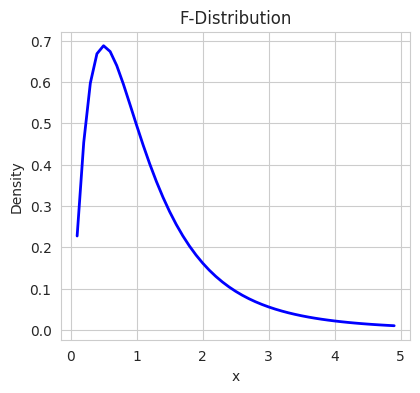

In [ ]:
from scipy.stats import f as f_dist

# Define a range of x values
x_values = np.arange(0.1, 5, 0.1) # Define your range accordingly
# Calculate the probability density function (pdf) of the F-distribution for given degrees of freedom df1 and df2
pdf_values = f_dist.pdf(x_values, dfn=5, dfd=10) # Change df1 and df2 as needed
# Plot the F-distribution
plt.figure(figsize=(4.5, 4))
plt.plot(x_values, pdf_values, color='blue', linewidth=2)
plt.title('F-Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.show()

## Hypothesis Testing

Hypothesis testing is a widely used statistical approach that enables researchers to conclude a population parameter based on the sample data. It is a technique used to evaluate the validity of a hypothesis by examining the evidence presented through the data. It involves setting up two competing hypotheses: a **null hypothesis** and an **alternative hypothesis**. The null hypothesis is generally considered the default hypothesis, stating that there is no significant difference between the sample and the population. The alternative hypothesis, on the other hand, is the hypothesis that is tested against the null hypothesis and is generally the researcher's primary hypothesis. After setting up the hypotheses, the researcher collects data to determine which hypothesis is more likely to be true. The process involves analyzing the evidence presented by the data to either accept or reject the null hypothesis. Hypothesis testing is a powerful tool that allows researchers to make informed decisions based on statistical evidence.

**Key Steps in Hypothesis Testing:**
1. **Formulating Hypotheses:**
    - **Null Hypothesis (H0):** Represents the status quo or no effect.
    - **Alternative Hypothesis ( Sixty):** Contradicts the null hypothesis, suggesting an effect or difference.
2. **Choosing a Significance Level (α):**
    - The significance level is the threshold for rejecting the null hypothesis.
    - Commonly used values are 0.05 or 0.01.
3. **Collecting and Analyzing Data:**
    - Use sample data to compute a test statistic that helps determine the likelihood of observing the data under the null hypothesis.
4. **Making a Decision:**
    - Compare the test statistic to a critical value (from a statistical distribution) or calculate a p-value.
    - If the test statistic falls into the rejection region (extreme values), reject the null hypothesis. Otherwise, fail to reject it.
5. **Drawing Conclusion:**
    - Based on the analysis, decide whether there is enough evidence to support the alternative hypothesis or if there's insufficient evidence to reject the null hypothesis.

### T-test

A **t-test** is a statistical hypothesis test that compares the means of two groups or samples to determine if they are significantly different from each other. A commonly used parametric test assumes the data follows a normal distribution. There are two types of t-tests: **One-sample t-test** and **Two-sample t-test**. The one-sample t-test is used to determine if a sample mean is significantly different from a known population mean. While a two-sample t-test is a statistical test used to determine if two sets of data are significantly different from each other.

1. **One-Sample T-Test:**
$$ t = \frac{\bar{X} - \mu_0}{\frac{s}{\sqrt{n}}} $$
- $t$ is the t-statistic.
- $\bar{X}$ is the sample mean.
- $\mu_0$ is the hypothesized population mean.
- $s$ is the sample standard deviation.
- $n$ is the number of observations in the sample.

2. **Two-Sample T-Test (Independent Samples):**
    - Formula: $$ t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $$
- $t$ is the t-statistic.
- $\bar{X}_1$ and $\bar{X}_2$ are the means of the two independent samples.
- $s_1$ and $s_2$ are the standard deviations of the two independent samples.
- $n_1$ and $n_2$ are the sizes of the two independent samples.

In these formulas, $\bar{X}$ represents the sample mean, $\mu_0$ is the hypothesized population mean, $s$ is the sample standard deviation, and $n$ is the number of observations in the sample. The `t-statistic` is then compared to a critical value from the **t-distribution** to assess statistical significance.

The `ttest_1samp` calculates the t-value and then compares it to a critical value from the t-distribution to determine if the difference between the means is statistically significant. If the t-value is greater than the critical value, then we conclude that there is a significant difference between the means of the two groups or samples.

In [ ]:
np.random.seed(42) # Setting seed for reproducibility
# Sample
sample_data = np.random.choice(mf['GAs'], size=50)
sample_mean = np.mean(sample_data)
print(sample_mean)
# Population
population_mean = mf['GAs'].mean()
print(population_mean)
# One-sample t-test (testing if the sample_mean is significantly different population_mean)
t_test_result = stats.ttest_1samp(sample_data, popmean=population_mean)
print(t_test_result)

1.3917765242
1.3600298571214287
TtestResult(statistic=np.float64(0.542319269286045), pvalue=np.float64(0.5900566524230653), df=np.int64(49))


In this example, a one-sample t-test is performed in Python to determine if the mean of the sample is significantly different from true mean. The `ttest_1samp` function computes the test statistic, the p-value, and provides information to decide whether to reject the null hypothesis. Since the p-value is greater than the level of significance (α) = 0.05, we may accept the null hypothesis and conclude that the sample and population means are not significantly different.

### Chi-Square Test ($\chi^2$-test)

The chi-square test is a statistical test used to determine if there is a significant association between two categorical variables. It is based on the comparison of observed and expected frequencies in a contingency table which shows the frequencies of the joint occurrences of the categories of the two variables.

The expected frequency for a cell is calculated as

$$ \frac{\text{Row Total} \times \text{Column Total}}{\text{Grand Total}} $$

Calculate the chi-square ($\chi^2$) statistic using the formula: $$ \chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}} $$ - Where:
- $O_{ij}$ is the observed frequency in cell ($i, j$).
- $E_{ij}$ is the expected frequency in cell ($i, j$).

The chi-square test is commonly used in various fields, including biology, social sciences, and business, to assess the independence of categorical variables. The test is applicable when the variables are categorical and the observations are independent. If the chi-square test indicates a significant association, additional analysis may be needed to understand the nature of the relationship.

In Python, the chi-square test can be conducted using the `chi2_contingency` function from SciPy. Here's a basic example illustrating how to perform a chi-square test in Python:

In [ ]:
from scipy.stats import chi2_contingency

## Create a contingency table (example data)
df = np.array([[40, 10], [11, 25]])
# Display the observed data (contingency table)
print("Contingency Table:")
print(df)
# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(df)
# Display the results
print("\nChi-Square Test Result:")
print(f"Chi2: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Contingency Table:
[[40 10]
 [11 25]]

Chi-Square Test Result:
Chi2: 19.202357298474944
p-value: 1.1756812036682639e-05
Degrees of Freedom: 1
Expected Frequencies:
[[29.65116279 20.34883721]
 [21.34883721 14.65116279]]


### F-Test

The F-test is a statistical test used to compare the variances of two or more groups. The test is based on the F-statistic, which is the ratio of the variances. The F-test is commonly used in analysis of variance (ANOVA) and regression analysis. Here are the key components and steps of the F-test:

$$ F = \frac{\text{Variance Between Groups}}{\text{Variance Within Groups}} $$

Degrees of Freedom:
- $df_{\text{between}} = k - 1$ (where $k$ is the number of groups).
- $df_{\text{within}} = N - k$ (where $N$ is the total number of observations).

The F-test is used to assess whether the variances among groups are significantly different. If the test indicates a significant difference, it may suggest the need for further investigation into which specific groups have different variances.

In Python, you can perform an F-test for comparing variances using the Levene's test from SciPy, which is a robust alternative to the classic F-test.

In [ ]:
from scipy.stats import levene

# Assuming TREAT has levels like 'Low As' and 'High As' - adjust based on data
group1 = mf[mf['TREAT'] == 'Low As']['GY']
group2 = mf[mf['TREAT'] == 'High As']['GY']
f_test_result = levene(group1, group2)
print(f_test_result)

LeveneResult(statistic=np.float64(nan), pvalue=np.float64(nan))


/tmp/ipykernel_12002/2596962092.py:6: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_test_result = levene(group1, group2)


## Summary and Conclusion

This tutorial aims to equip users with the necessary tools to draw insightful conclusions and make accurate inference based on sample data. It covers a range of fundamental concepts, including the distinction between populations and samples and the critical role of statistical inference in decision-making. Additionally, it delves into essential topics such as hypothesis testing and t-tests, commonly used statistical techniques for testing hypotheses and comparing means between two groups.

The tutorial provides clear explanations and practical examples for each concept covered, making it easy for users to understand and apply what they learn. It also includes step-by-step instructions on how to use Python to perform various inferential statistics analyses, such as calculating confidence intervals, conducting hypothesis tests, and performing t-tests. Detailed **correlation** and **regression** analyses and **ANOVA** are discussed later.

Whether you're a beginner or an advanced user seeking to improve your inferential statistics skills, this tutorial is an invaluable resource that can help you achieve your goals. By the end of the tutorial, you will have a solid understanding of inferential statistics and how to use Python to draw meaningful conclusions and make accurate predictions based on sample data.

## Resources

1. [Basic Inferential Statistics using Python](https://scipy-lectures.org/packages/statistics/index.html)
2. [Chapter 15 Statistical inference](https://rafalab.dfci.harvard.edu/dsbook/inference.html) (Adaptable to Python)
3. [Chapter 4 Statistical Inference](https://bookdown.org/mike/data_analysis/hypothesis-testing.html) (Python examples)
4. [Introduction to basic statistics with Python](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html) (Broader stats context)
5. [Introduction to statistics with Python](https://www.statsmodels.org/stable/index.html) (Using statsmodels)